In [1]:
from fastai.text import * 

In [2]:
path = Path('/home/jupyter/projects/project-3/train'); path

PosixPath('/home/jupyter/projects/project-3/train')

In [10]:
df_clas = pd.read_csv(path/'nyt-ingredients-snapshot-2015.csv')
df_clas = df_clas.fillna(" ").drop(['index', 'range_end', 'input'], axis=1)
df_clas = pd.melt(df_clas, value_vars=['name', 'qty', 'unit', 'comment'], var_name='label', value_name='text')
df_clas.to_csv('train/nyt-ingredients-snapshot-2015-no-null.csv',index=False)
df.head()

,label,text
0,name,butternut squash
1,name,chestnuts
2,name,onion
3,name,celery
4,name,vegetable oil


In [6]:
df_lm = pd.read_csv(path/'nyt-ingredients-snapshot-2015-inputs.csv')
df_lm = df_lm.fillna(" ").drop(['index', 'name', 'qty', 'range_end', 'unit', 'comment'], axis=1)
df_lm.to_csv('train/nyt-ingredients-snapshot-2015-inputs.csv', index=False)

In [4]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'nyt-ingredients-snapshot-2015-inputs.csv', text_cols='input')
data_lm.show_batch()

idx,text
0,"ounce dry vermouth xxbos 1 / 2 cup finely sliced shallots xxbos xxmaj fresh watercress for garnish ( optional ) xxbos 3 tablespoons kosher salt xxbos 1 4- to 5-pound chicken , chopped through bones and skin into 2- or 3-inch pieces ( have butcher do this ) xxbos xxmaj salt xxbos 155 grams ( 1 1 / 3 cup ) confectioners ’ sugar xxbos 2 medium - size artichokes"
1,"xxbos 1 / 2 teaspoon ground cardamom xxbos 3 sprigs fresh thyme , or 1 teaspoon dried xxbos 1 1 1 / 4-pound live lobster xxbos 2 1 / 2 tablespoons allspice xxbos 1 tablespoon olive oil xxbos 1 cup chicken broth , homemade or low - sodium canned xxbos 2 bunches watercress or arugula , cleaned and trimmed xxbos 1 1 / 2 cups granulated sugar xxbos 2 tablespoons"
2,"cup fresh white breadcrumbs xxbos 2 / 3 cup sugar xxbos 1 / 3 cup sugar xxbos 1 tablespoon peanut , corn or vegetable oil xxbos 1 tablespoon water xxbos 1 / 4 cup minced fresh chives xxbos xxmaj salt to taste xxbos 2 tablespoons butter xxbos 2 cups cilantro leaves ( 2 large bunches ) xxbos 1 / 4 cup chopped onion xxbos 2 cups heavy cream xxbos 1"
3,"cups well - flavored chicken stock xxbos 1 teaspoon xxmaj dijon mustard xxbos 1 3 / 4 cups sugar xxbos 1 / 4 cup chicken fat or vegetable oil xxbos 1 cup finely chopped onion xxbos 2 1 / 2 pounds spinach in bulk , or two 10-ounce plastic wrapped bags xxbos 1 / 2 bunch mint leaves , torn ( about 1 / 3 cup ) xxbos 1 /"
4,"2 tablespoons olive oil xxbos 1 / 4 cup xxmaj marcona almonds xxbos 2 / 3 cup ( 5 ounces ) sugar \n \n xxbos 1 / 2 cup plus 2 tablespoons granulated sugar xxbos 2 limes , cut into wedges xxbos xxmaj salt and pepper xxbos 1 / 4 teaspoon ground cumin xxbos xxmaj freshly ground black pepper to taste xxbos 2 tablespoons flour xxbos xxmaj freshly ground"


In [21]:
data_clas = TextClasDataBunch.from_csv(path, 'nyt-ingredients-snapshot-2015-no-null.csv', vocab=data_lm.train_ds.vocab, bs=32)
data_clas.show_batch()

text,target
"xxbos or xxmaj finely grated peel of one tangerine , or 1 / 2 cup smooth peanut butter , or 1 teaspoon banana extract , or 3 tablespoons instant coffee , regular or espresso , or 1 / 2 cup pureed raspberries , strained and mixed with 1 / 4 cup sugar , or 1 / 4 to 1 / 2 teaspoon xxunk",comment
"xxbos leaves washed , stemmed , stacked and finely diced ( do not chop roughly or the will xxunk and turn brown ) or 1 bunch chives , minced",comment
"xxbos 2-inch , both ends cut to expose the marrow ( the bones should be smooth and xxunk for the most xxunk xxunk )",comment
"xxbos xxmaj white and pale green parts of 1 / 2 pound of leeks ( 2 medium ) , cut crosswise into 2-inch pieces",name
"xxbos extra - large , beaten , plus 1 to 2 teaspoons beaten egg / 63 grams beaten egg",comment


In [22]:
data_lm.save('data_lm_export.pkl')


In [23]:
data_clas.save('data_clas_export.pkl')

In [9]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


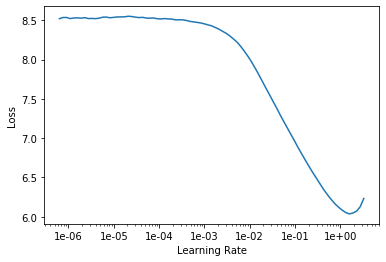

In [11]:
learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.146157,2.088956,0.506613,01:04
1,2.056194,2.007310,0.519893,01:06
2,1.908113,1.927577,0.532156,01:06
3,1.773770,1.910386,0.536704,01:06


In [28]:
learn.predict("garlic", n_words=4)

'garlic cloves , minced xxbos'

In [29]:
learn.save_encoder('ft_enc')

In [30]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (573462 items)
x: TextList
xxbos rack,xxbos xxunk,xxbos or 300 grams,xxbos,xxbos xxunk
y: CategoryList
unit,qty,comment,unit,qty
Path: /home/jupyter/projects/project-3/train;

Valid: LabelList (143366 items)
x: TextList
xxbos cup,xxbos,xxbos cup,xxbos extra virgin,xxbos dry white wine
y: CategoryList
unit,comment,unit,comment,name
Path: /home/jupyter/projects/project-3/train;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(4504, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(4504, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDr

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


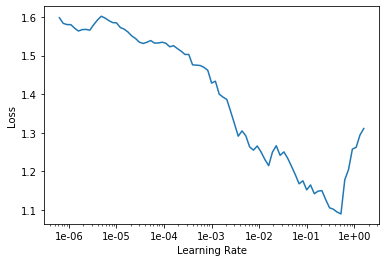

In [31]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, 1e-3)
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time


In [36]:
learn.predict('1 cup of chopped garlic')

(Category name,
 tensor(1),
 tensor([5.1414e-02, 9.4250e-01, 5.5407e-05, 6.0321e-03]))

In [37]:
learn.predict('1')

(Category qty, tensor(2), tensor([0.0577, 0.0529, 0.8863, 0.0030]))

In [38]:
learn.predict('chopped')

(Category comment,
 tensor(0),
 tensor([6.0355e-01, 1.0581e-02, 7.0614e-05, 3.8580e-01]))

In [39]:
learn.predict('cup')

(Category unit,
 tensor(3),
 tensor([1.4892e-03, 4.3206e-04, 4.7402e-06, 9.9807e-01]))

In [39]:
alphabet = '1/2 cup lukewarm water (100 degrees F/38 degrees C)'
data = alphabet.split() #split string into a list

for temp in data:
    print(temp)
    print(learn.predict(temp)[0])

1/2
comment
cup
unit
lukewarm
comment
water
name
(100
comment
degrees
name
F/38
name
degrees
name
C)
name
